In [1]:
# homework_set_9.ipynb

## EE 351M Homework Set 9 Problem 2
# Eric Graves
# edg732
# Created 12/09/2019

In [4]:
import numpy as np
from matplotlib import pyplot as plt

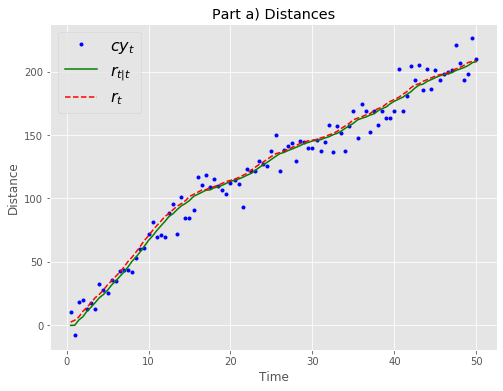

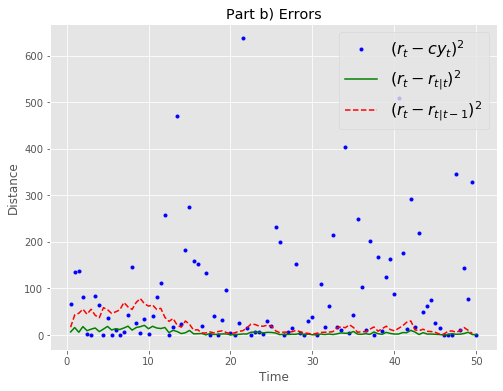

In [74]:
#%% Read data
xy = np.load('xt_yt.npz')
xt = xy['xt']
yt = xy['yt']

dt = 0.5            # Delta_t from notes
c = 3e8             # Speed of light
x_sd = 0.5          # Standard dev of state noise
y_sd = 10*1.0/c     # Standard dev of measurement noise

tlen = 100
t = dt*np.linspace(1,100,100)   # Time axis

x0 = np.array([1,5])  # Initial position and velocity
u = 0.5*np.sin(t)     # Input = Ft/m from notes

vt = np.random.normal(0, y_sd, tlen)

# Matrices for state space model
#-- x_t vector containing description of state at time t
#-- u_t vector containing control inputs
#-- w_t vector containing process noise for each parameter in u_t
Ft = np.array([[1,dt],[0,1]])       # state transition matrix
Bt = np.array([0.5*dt*dt, dt]).T    # control input matrix

#-- z_t vector of measurements
Ht = np.array([[1,dt],[0,1]])       # Transformation matrix, Maps: state vector parameters --> measurement domain
#-- w_t vector containing measurement noise for each observation in z_t

Qt = np.array([[x_sd,0],[0,x_sd]])        # process noise covariance matrix associated with noisy control inputs
Rt = np.array([[y_sd,0],[0,y_sd]])  # measurement noise covariance matrix associated with noisy measurements 

#%% Kalman filter implementation
xt_pred = np.zeros((2,tlen))    # xt|t-1
x_init = np.array([1,1])        # Random initialization
P_init = np.eye(2)              # Random initialization
xtt = np.zeros((2,tlen))        # xt|t
Pt_pred = np.zeros((2,2,tlen))  # Pt|t-1
Ptt = np.zeros((2,2,tlen))      # Pt|t


# For each time: (process entire matrix at once)
for i in range(0,tlen-1):
    
    # Prediction Stage:
    xt_pred[:,i+1] = np.dot(Ft, xt_pred[:,i] + np.dot(Bt, u[i]))
    Pt_pred[:,:, i+1] = np.dot(Ft, np.dot(Pt_pred[:,:,i], (Ft.T))) + Qt

    # Gain
    Kt = np.dot(Pt_pred[:,:, i], np.dot((Ht.T),np.linalg.inv(np.dot(Ht, np.dot(Pt_pred[:,:, i],(Ht.T)) + Rt))))

    # Meausrement Update:
    temp = xt[:,i] + vt[i] - np.dot(Ht, xt_pred[:,i])
    
    xtt[:,i+1] = xt_pred[:,i+1] + np.dot(Kt, (np.dot(Ht, temp)))
    Ptt[:,:, i+1] = Pt_pred[:,:, i] - np.dot(Kt, np.dot(Ht,Pt_pred[:,:, i]))

# -- 

# Reshape arrays to plot r_t vs r_t|t-1
rt_dif = (xt[0,1:tlen] - xtt[0,0:tlen-1])
rt_dif = rt_dif*rt_dif

with plt.style.context('ggplot'): # Set style to be like R
    #%% The first plot:
    plt.figure(figsize = (8,6))
    plt.plot(t,c*yt,'b.',label='$cy_t$')
    plt.plot(t,xtt[0,:],'g',label='$r_{t|t}$')
    plt.plot(t,xt[0,:],'r--',label=r'$r_t$')
    plt.legend(prop={'size': 16})
    plt.ylabel('Distance') 
    plt.xlabel('Time') 
    plt.title('Part a) Distances')
    plt.show()
    
    #%% The second plot:
    plt.figure(figsize = (8,6))
    plt.plot(t,(xt[0,:] - c*yt)*(xt[0,:] - c*yt),'b.',label='$(r_t - cy_t)^2$')
    plt.plot(t,(xt[0,:] - xtt[0,:])*(xt[0,:] - xtt[0,:]),'g',label='$(r_t - r_{t|t})^2$')
    plt.plot(t[0:tlen-1],rt_dif,'r--',label=r'$(r_t - r_{t|t-1})^2$')
    plt.legend(prop={'size': 16})
    plt.ylabel('Error') 
    plt.xlabel('Time') 
    plt.title('Part b) Errors')
    plt.show()
    


    # Style stuff below
    font = {'family': 'sans',
           'color':  'black',
           'weight': 'normal',
           'size': 16,
           }